In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import math
from sklearn.linear_model import LinearRegression #mô hình hồi quy tuyến tính
import statistics as sta
print('Completed import lib')

Completed import lib


# Xử lý data

In [2]:
# customer_data = pd.read_excel('D:/Mindx-Career-Kick-start/DA_TEST_1(test2)/customers_data.xlsx',sheet_name='customer info')
# items_data = pd.read_excel('D:/Mindx-Career-Kick-start/DA_TEST_1(test2)/customers_data.xlsx',sheet_name='Items')
# customer_transactions = pd.read_excel('D:/Mindx-Career-Kick-start/DA_TEST_1(test2)/customers_data.xlsx',sheet_name='Customer transactions')

customer_data = pd.read_excel('customers_data.xlsx',sheet_name='customer info')
items_data = pd.read_excel('customers_data.xlsx',sheet_name='Items')
customer_transactions = pd.read_excel('customers_data.xlsx',sheet_name='Customer transactions')

In [3]:
os.chdir('../DA_TEST_1(test2)/Traffic')

extension = 'xlsx'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
traffic_data = pd.concat([pd.read_excel(f) for f in all_filenames ])
traffic_data

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08
...,...,...,...,...,...,...
461,/2020/12/yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35
462,/2020/12/yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00
463,/2020/12/you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54
464,/2020/12/youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22


In [4]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17889 entries, 0 to 465
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Page URL                17889 non-null  object        
 1   users                   17889 non-null  float64       
 2   uniquePageviews         17889 non-null  float64       
 3   pageviews               17889 non-null  float64       
 4   Brand                   17889 non-null  object        
 5   Posted On (DD/MM/YYYY)  17889 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 978.3+ KB


In [5]:
customer_data

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N
...,...,...,...,...,...,...,...,...
765,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,2016-09-05,F,1989-10-25,N
766,766.0,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,2016-09-05,NaN,1965-07-25,Y
767,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,2016-09-05,M,1980-11-07,Y
768,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,2016-09-05,M,1980-09-17,Y


In [6]:
items_data

,ItemID,Product,Brand,SellPrice,CostPrice
0,1.0,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943.0,359.0
1,2.0,070ttream0.518887735674677,GO4582ey<S!+k1VE,717.0,207.0
2,3.0,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739.0,199.0
3,4.0,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532.0,262.0
4,5.0,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593.0,392.0
...,...,...,...,...,...
17884,17885.0,zarzmodel0.705343660670698,"Zah<@kD,N[_x007f_Vo]vf",202.0,42.0
17885,17886.0,zelQailer0.599088919243258,Nia_TfHUVDtT>6-s,463.0,131.0
17886,17887.0,zenyation0.980382120595891,Chbm3nL;wgcU<S(y,688.0,200.0
17887,17888.0,zenvition0.646980947183814,"Ac8IJsKH,4xtY.Tk",157.0,63.0


In [7]:
customer_transactions

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0.0,0.0,352.0,2020-03-21,In Store
1,0.0,0.0,3433.0,2020-07-14,In Store
2,0.0,0.0,11162.0,2020-08-09,In Store
3,0.0,0.0,13011.0,2020-12-07,In Store
4,0.0,0.0,13885.0,2020-11-08,In Store
...,...,...,...,...,...
25208,8361.0,769.0,10053.0,2020-12-19,In Store
25209,8361.0,769.0,13162.0,2020-02-04,In Store
25210,8362.0,769.0,8727.0,2020-11-18,In Store
25211,8362.0,769.0,13065.0,2020-05-11,In Store


In [8]:
sell = pd.merge(customer_transactions, items_data[['ItemID','Brand','SellPrice','CostPrice']], on='ItemID',how='left')
sell['month'] = pd.DatetimeIndex(sell['TransactionDate']).month
sell['year'] = pd.DatetimeIndex(sell['TransactionDate']).year
sell


,OrderID,CustomerID,ItemID,TransactionDate,Channel,Brand,SellPrice,CostPrice,month,year
0,0.0,0.0,352.0,2020-03-21,In Store,"MouDd/fn,XEARhBp",735.0,426.0,3,2020
1,0.0,0.0,3433.0,2020-07-14,In Store,"muy(D#""d02`vwt_^",963.0,491.0,7,2020
2,0.0,0.0,11162.0,2020-08-09,In Store,Wem+H2Pk8Jfbb*[D,582.0,391.0,8,2020
3,0.0,0.0,13011.0,2020-12-07,In Store,ThcmX`v~{K~t{Jeh,339.0,135.0,12,2020
4,0.0,0.0,13885.0,2020-11-08,In Store,Ka53T<K8f.2M94Yd,1369.0,231.0,11,2020
...,...,...,...,...,...,...,...,...,...,...
25208,8361.0,769.0,10053.0,2020-12-19,In Store,"Ac8IJsKH,4xtY.Tk",1077.0,242.0,12,2020
25209,8361.0,769.0,13162.0,2020-02-04,In Store,"Ince!T,;eW/4o\eg",1140.0,253.0,2,2020
25210,8362.0,769.0,8727.0,2020-11-18,In Store,WaQqK)2JxI(=dac=,205.0,66.0,11,2020
25211,8362.0,769.0,13065.0,2020-05-11,In Store,"Uny~Y,~<rTC^J6py",1012.0,272.0,5,2020


# 1.	Website traffic có ảnh hưởng đến doanh thu không ?

### Lượng view và user sử dụng trong năm 2020

In [9]:
traffic_data['date'] = pd.to_datetime(traffic_data['Posted On (DD/MM/YYYY)']).dt.date
traffic_data_2 = traffic_data.groupby(['date'])[['users','uniquePageviews','pageviews','Brand','date']].sum()
traffic_data_2.reset_index(inplace=True)
traffic_data_2

,date,users,uniquePageviews,pageviews
0,2020-01-01,63755.4,64814.8,70353.6
1,2020-01-02,111861.4,113640.0,122557.8
2,2020-01-03,63749.8,65175.4,71058.0
3,2020-01-04,13946.0,14274.6,15349.6
4,2020-01-05,47065.0,47856.6,51438.2
...,...,...,...,...
338,2020-12-05,23906.0,24678.8,27024.6
339,2020-12-06,25892.8,26517.0,28433.4
340,2020-12-07,95081.8,97565.0,105456.0
341,2020-12-08,100577.0,105419.6,150902.2


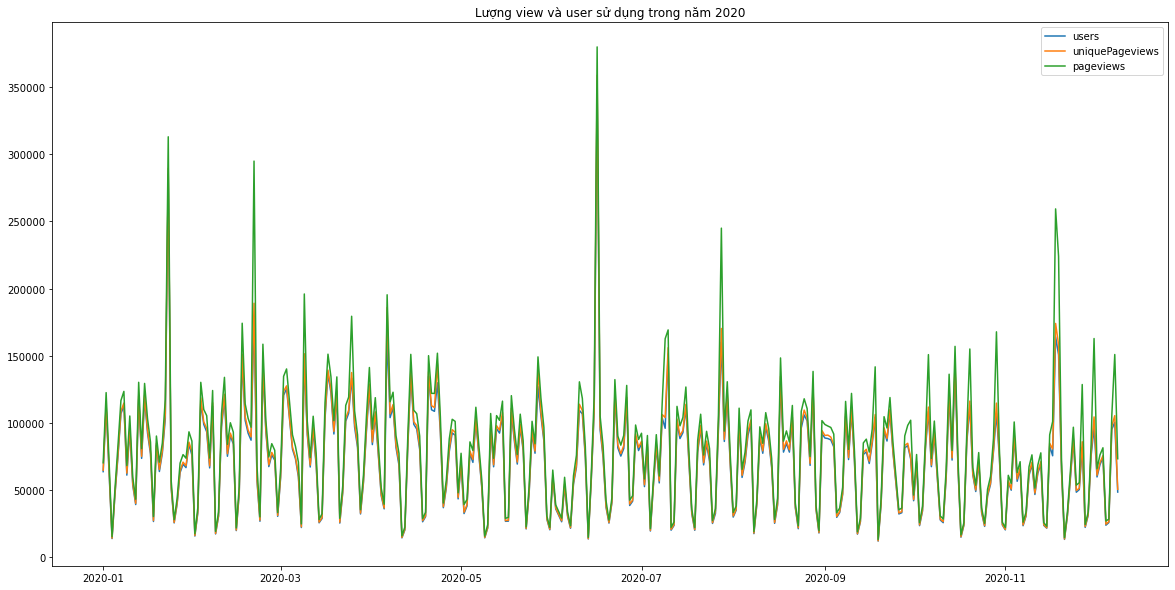

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
fig.patch.set_facecolor('w')
xs = traffic_data_2['date']
y_users = traffic_data_2['users']
y_uniview = traffic_data_2['uniquePageviews']
y_pageview = traffic_data_2['pageviews']

plt.plot(xs,y_users, label='users')
plt.plot(xs,y_uniview, label='uniquePageviews')
plt.plot(xs,y_pageview, label='pageviews')


plt.title('Lượng view và user sử dụng trong năm 2020')
plt.legend()
plt.show()

### Doanh thu bán hàng online và bán hàng tại chỗ

In [11]:
revenus_year = sell.groupby('Channel')[['SellPrice']].sum()
revenus_year.loc['Column_Total']= revenus_year.sum(numeric_only=True, axis=0)
revenus_year.reset_index(inplace=True)
revenus_year['change%'] = (revenus_year['SellPrice']/int(revenus_year['SellPrice'].iloc[2:3]))*100
revenus_year

,Channel,SellPrice,change%
0,In Store,10222263.0,50.066875
1,Online,10194955.0,49.933125
2,Column_Total,20417218.0,100.000000


<AxesSubplot:xlabel='Channel', ylabel='change%'>

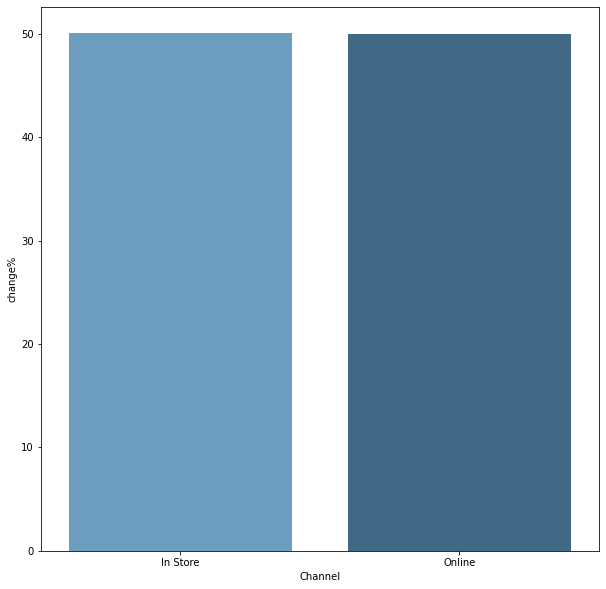

In [12]:
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('w')
sns.barplot(x='Channel', y='change%', data=revenus_year.loc[revenus_year['Channel'] != 'Column_Total'],palette="Blues_d")

Tại năm 2020 doanh thu từ bán hàng online chiếm 49.9% tổng doanh thu của nhãn hàng, cho thấy doanh thu từ bán hàng online có sự ảnh hưởng rất lớn đến doanh nghiệp

In [13]:
sell_month = sell.copy()
revenus_month = sell_month.groupby(['Channel','month'])[['SellPrice']].sum()
revenus_month.reset_index(inplace=True)
revenus_month

,Channel,month,SellPrice
0,In Store,1,832491.0
1,In Store,2,818208.0
2,In Store,3,847625.0
3,In Store,4,877582.0
4,In Store,5,839278.0
5,In Store,6,873757.0
6,In Store,7,851370.0
7,In Store,8,856549.0
8,In Store,9,874165.0
9,In Store,10,817780.0


<AxesSubplot:xlabel='month', ylabel='SellPrice'>

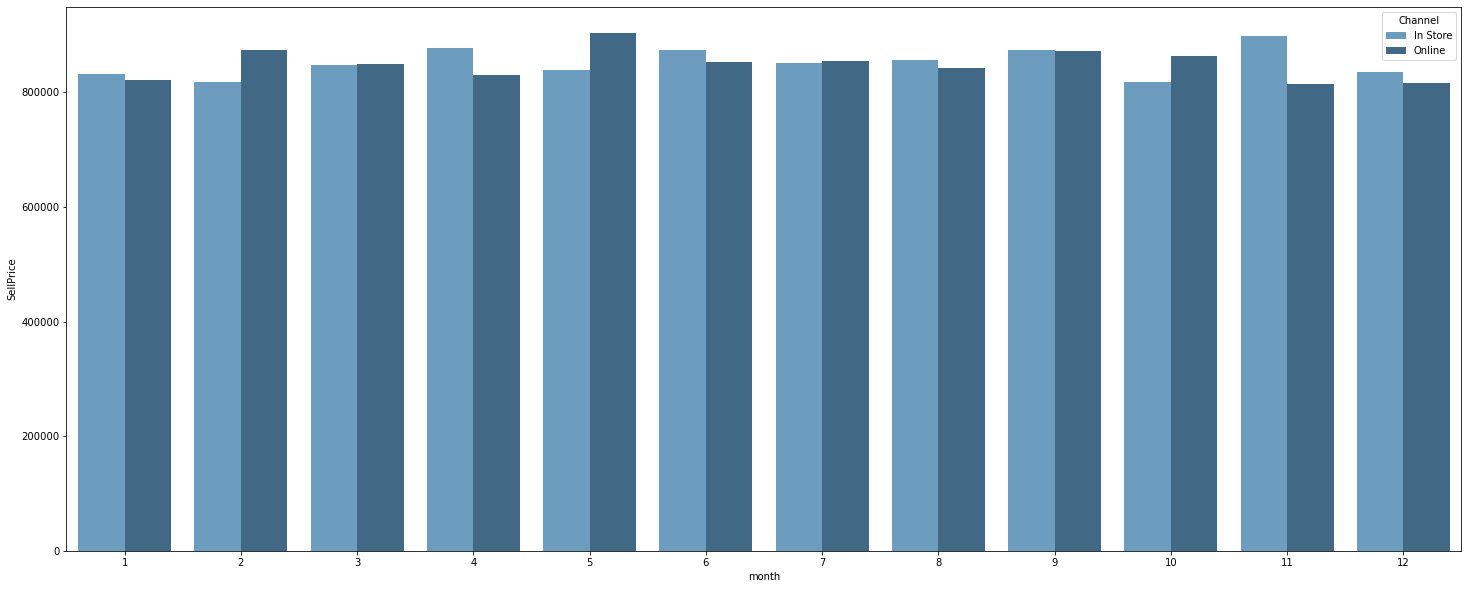

In [14]:
fig = plt.figure(figsize=(25,10))
fig.patch.set_facecolor('w')
sns.barplot(x='month', y='SellPrice', data=revenus_month,hue='Channel',palette="Blues_d")

Doanh thu trung bình từ bán hàng truyền thống cao hơn doanh thu từ bán hàng online vào thời gian nghỉ lễ cuối và đầu năm. Giai đoạn giữa năm doanh thu trung bình không chênh lệch quá nhiều.

# 2.	Sản phẩm nào mang lại pageviews và doanh thu

In [15]:
items_view = traffic_data.groupby(['Brand'])[['pageviews','uniquePageviews']].sum()
items_view.sort_values(by='pageviews', ascending=False, inplace= True)
items_view['view_rank'] = items_view['pageviews'].rank(ascending=False)
items_view.reset_index(inplace=True)
items_view

,Brand,pageviews,uniquePageviews,view_rank
0,NiPea$n|Eu@<@>'L,3517393.2,3198872.6,1.0
1,ad(;%f6iD'}9EHD[,1103954.0,1016166.6,2.0
2,"Jo?$J}r_""0#/!m:",1033765.2,947164.8,3.0
3,"Ac8IJsKH,4xtY.Tk",981379.0,895999.2,4.0
4,Ap!FulqmT[82a2/E,603145.2,571500.6,5.0
...,...,...,...,...
3350,Ma?Mwli9eyEN''@w,2.0,2.0,3351.5
3351,AmN]c$u[M;A^YJcU,2.0,2.0,3351.5
3352,"Ve""""8X{n*HPW!bil",1.6,1.6,3353.0
3353,Tir72~+xaqy!(G\-,0.4,0.4,3354.5


In [16]:
items_res = sell.groupby(['Brand'])[['SellPrice']].sum()
items_res.sort_values(by='SellPrice', ascending=False, inplace= True)
items_res['sell_rank'] = items_res['SellPrice'].rank(ascending=False)
items_res = pd.merge(items_res,items_view,on='Brand',how='left')
items_res.reset_index(inplace=True,drop=True)
items_res

,Brand,SellPrice,sell_rank,pageviews,uniquePageviews,view_rank
0,NiPea$n|Eu@<@>'L,1317712.0,1.0,3517393.2,3198872.6,1.0
1,"Ac8IJsKH,4xtY.Tk",718302.0,2.0,981379.0,895999.2,4.0
2,ad(;%f6iD'}9EHD[,519038.0,3.0,1103954.0,1016166.6,2.0
3,"muy(D#""d02`vwt_^",353514.0,4.0,120811.0,112079.2,32.0
4,Nes[8ukT8KBR8yVs,302239.0,5.0,455534.8,412994.6,8.0
...,...,...,...,...,...,...
2785,Br=hl/-_x007f_}_x007f_dZ~J.?,101.0,2786.0,NaN,NaN,NaN
2786,Te/6_R<*I)Fc!@S:,81.0,2787.0,500.6,469.8,2325.0
2787,Ca@]7ed?aB@_Sdw(,77.0,2788.0,173.0,161.8,3121.0
2788,Te-'32vNJ;E#BvCC,74.0,2789.0,2217.4,2069.2,1031.0


In [39]:
items_res_view = items_res.sort_values(by='pageviews', ascending=False)
items_res_view.reset_index(inplace=True,drop=True)
items_res_view = items_res_view[['Brand','pageviews','SellPrice','view_rank','sell_rank']].head(10)
items_res_view

,Brand,pageviews,SellPrice,view_rank,sell_rank
0,NiPea$n|Eu@<@>'L,3517393.2,1317712.0,1.0,1.0
1,ad(;%f6iD'}9EHD[,1103954.0,519038.0,2.0,3.0
2,"Ac8IJsKH,4xtY.Tk",981379.0,718302.0,4.0,2.0
3,Ap!FulqmT[82a2/E,603145.2,258897.0,5.0,7.0
4,SuUM.u7T\&9RNdZ6,553873.6,109550.0,6.0,19.0
5,Nes[8ukT8KBR8yVs,455534.8,302239.0,8.0,5.0
6,Ka53T<K8f.2M94Yd,355740.0,109695.0,9.0,17.0
7,Nia_TfHUVDtT>6-s,327050.4,108677.0,10.0,20.0
8,PU]vXmX9fgf$xf!/,308014.0,107874.0,11.0,21.0
9,"MouDd/fn,XEARhBp",297633.0,238473.0,12.0,10.0


Text(0.1, 0.95, 'Top 10 sản phẩm có page view cao nhất')

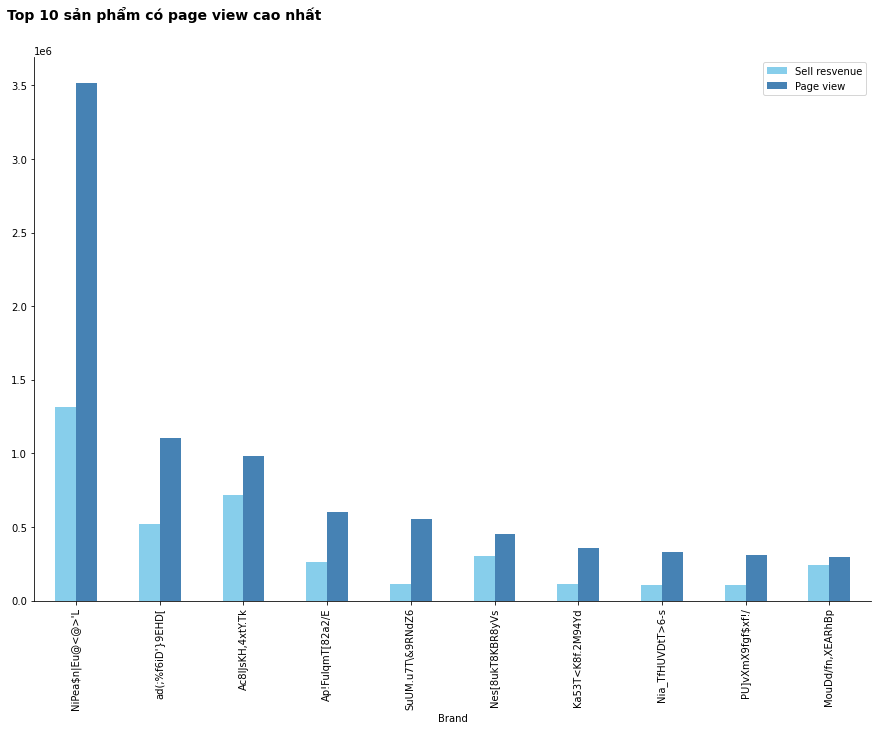

In [59]:
fig, ax = plt.subplots(facecolor='w')
items_res_view.plot(x="Brand", y=["SellPrice", "pageviews"], kind="bar",ax=ax ,figsize=(15,10),color=['skyblue','steelblue'], label=['Sell resvenue','Page view'])

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

plt.suptitle('Top 10 sản phẩm có page view cao nhất', fontweight='bold', size=14, horizontalalignment='left', x=0.1, y =0.95)

In [42]:
items_res_sell = items_res[['Brand','SellPrice','pageviews','sell_rank','view_rank']].head(10)
items_res_sell

,Brand,SellPrice,pageviews,sell_rank,view_rank
0,NiPea$n|Eu@<@>'L,1317712.0,3517393.2,1.0,1.0
1,"Ac8IJsKH,4xtY.Tk",718302.0,981379.0,2.0,4.0
2,ad(;%f6iD'}9EHD[,519038.0,1103954.0,3.0,2.0
3,"muy(D#""d02`vwt_^",353514.0,120811.0,4.0,32.0
4,Nes[8ukT8KBR8yVs,302239.0,455534.8,5.0,8.0
5,"Jo?$J}r__x007f_""0#/!m:",290526.0,225376.8,6.0,16.0
6,Ap!FulqmT[82a2/E,258897.0,603145.2,7.0,5.0
7,Exa~e4sZi*|fpD<^,248695.0,62935.6,8.0,78.0
8,Al_w1b7Rgo1[d5(t,247433.0,142500.6,9.0,26.0
9,"MouDd/fn,XEARhBp",238473.0,297633.0,10.0,12.0


Text(0.1, 0.95, 'Top 10 sản phẩm có doanh thu bán cao nhất')

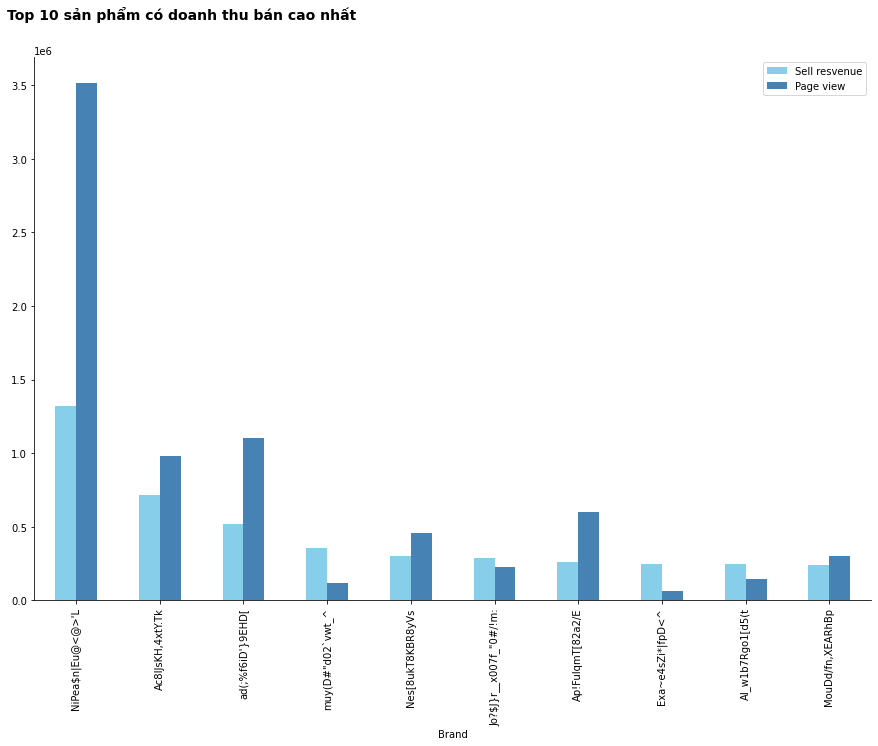

In [58]:
fig, ax = plt.subplots(facecolor='w')
items_res_sell.plot(x="Brand", y=["SellPrice", "pageviews"], kind="bar",ax=ax ,figsize=(15,10),color=['skyblue','steelblue'], label=['Sell resvenue','Page view'])

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

plt.suptitle('Top 10 sản phẩm có doanh thu bán cao nhất', fontweight='bold', size=14, horizontalalignment='left', x=0.1, y =0.95)

In [19]:
items_res.loc[items_res['pageviews'].isnull() == True]

,Brand,SellPrice,sell_rank,pageviews,uniquePageviews,view_rank
137,NO{m]9Jt1{r_x007f_Hr@E,22158.0,138.0,NaN,NaN,NaN
146,Ap8r`F[}sfP_x007f_->SZ,21023.0,147.0,NaN,NaN,NaN
168,Co$mc>0I_x007f_B/4/.-q,18290.0,169.0,NaN,NaN,NaN
181,To?fI_x007f_Gx]v`FD0Pv,16817.0,182.0,NaN,NaN,NaN
332,SX):-X_x007f_otL7qN.xH,9910.0,333.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2763,LasGkd_x007f_9CO6(|rzX,246.0,2763.0,NaN,NaN,NaN
2773,KO_x007f_7)Qo{U):'RIfN,213.0,2774.0,NaN,NaN,NaN
2775,Nii9Iyw916k_x007f_RoqH,204.0,2776.0,NaN,NaN,NaN
2778,PeIDEX+JTZ~e+_x007f_Y#,182.0,2778.5,NaN,NaN,NaN


In [20]:
items_res.isnull().sum()

Brand                0
SellPrice            0
sell_rank            0
pageviews          212
uniquePageviews    212
view_rank          212
dtype: int64

# 3. Có những nhóm khách hàng nào? 

In [61]:
data = customer_transactions.merge(customer_data,how='inner',left_on='CustomerID', right_on='ID').merge(items_data,how='inner',left_on='ItemID', right_on='ItemID')
data.drop('ID', inplace=True, axis=1)
data

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,0.0,0.0,352.0,2020-03-21,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
1,637.0,57.0,352.0,2020-03-15,In Store,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
2,0.0,0.0,3433.0,2020-07-14,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
3,1840.0,167.0,3433.0,2020-05-16,In Store,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
4,3386.0,307.0,3433.0,2020-04-23,In Store,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,NaN,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25208,8358.0,769.0,15836.0,2020-10-14,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,offqrview0.479298708383635,Vi1[g>Gp]F76d[;',197.0,146.0
25209,8359.0,769.0,5847.0,2020-05-27,Online,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,nnactream0.0225798759099386,"NN`~?6_x007f_^%O*KH,[S",833.0,280.0
25210,8362.0,769.0,8727.0,2020-11-18,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,g-snation0.0993461911005428,WaQqK)2JxI(=dac=,205.0,66.0
25211,8362.0,769.0,13065.0,2020-05-11,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,undflease0.156012002899051,"Uny~Y,~<rTC^J6py",1012.0,272.0


In [73]:
cus_data = data.groupby(["CustomerID","FirstName", "LastName","Country","Birthday","DateJoined","Newsletter",'Gender']).\
                            agg(total_expenditures = ('SellPrice','sum')).\
                            reset_index()
cus_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures
0,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,M,34948.0
1,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,F,17879.0
2,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,M,14603.0
3,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,M,37029.0
4,5.0,Celin0.498684223052738,Tio0.597043135639238,GER - Germany,1979-03-27,2015-12-23,Y,F,36913.0
...,...,...,...,...,...,...,...,...,...
514,764.0,Yuni0.412862497006326,C0.00700087328826338,UK - United Kingdom,1995-04-02,2015-05-25,Y,M,5205.0
515,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,F,29538.0
516,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,M,45470.0
517,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,M,35462.0


In [74]:
from datetime import date

today = date.today()

# tính tuổi
cus_data['Age'] = range(len(cus_data['Birthday']))
for i in range(len(cus_data['Birthday'])):
    cus_data['Age'][i] = today.year - cus_data['Birthday'][i].year

# tính số năm trở thành thành viên
cus_data['Loyalty'] = range(len(cus_data['DateJoined']))
for i in range(len(cus_data['DateJoined'])):
    cus_data['Loyalty'][i] = today.year - cus_data['DateJoined'][i].year

cus_data

C:\Users\dk201\AppData\Local\Temp/ipykernel_9896/4187620003.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_data['Age'][i] = today.year - cus_data['Birthday'][i].year
C:\Users\dk201\AppData\Local\Temp/ipykernel_9896/4187620003.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_data['Loyalty'][i] = today.year - cus_data['DateJoined'][i].year


,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures,Age,Loyalty
0,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,M,34948.0,13,7
1,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,F,17879.0,32,7
2,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,M,14603.0,48,7
3,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,M,37029.0,41,7
4,5.0,Celin0.498684223052738,Tio0.597043135639238,GER - Germany,1979-03-27,2015-12-23,Y,F,36913.0,43,7
...,...,...,...,...,...,...,...,...,...,...,...
514,764.0,Yuni0.412862497006326,C0.00700087328826338,UK - United Kingdom,1995-04-02,2015-05-25,Y,M,5205.0,27,7
515,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,F,29538.0,33,6
516,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,M,45470.0,42,6
517,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,M,35462.0,42,6


In [75]:
from termcolor import colored
list_=['Country','Newsletter','Loyalty','Gender']
for i in list_:
    print(colored("Column " + i, 'blue', attrs=['bold']))
    print(cus_data[i].unique())
    print("\n")

Column Country
['GER - Germany' 'FR - France' 'UK - United Kingdom' 'IT - Italy']


Column Newsletter
['Y' 'N']


Column Loyalty
[7 6]


Column Gender
['M' 'F']


